# Setting up env 

## imports / 3rd party

In [1]:
import sys
import os
sys.path.append('/Users/moharb/PycharmProjects/SpineImaging/')
import prep
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as py
from pySparkUtils.utils import save_rdd_as_pickle, load_rdd_from_pickle, change
py.init_notebook_mode()

## Imports for registration 

In [2]:
from prep.Behavior import runBehavior
from prep.Registration import *
from prep.SpineSession import SpineSession
from prep.IO import loadData, cropEmbed
from prep.Utils import browse_data3D, browse_data4D
from prep.Embedding import *

## Set up local SparkContext 

In [3]:
sc = change(master='local[4]')
sc.defaultParallelism

[pySparkUtils] INFO Returning new sc with 4 cores and 1 executors


4

# Registation 

## Set paths 

In [4]:
data_path = '/Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo'
session = SpineSession(basePath=data_path, animalID='BMWR30', date='151123', run='Run1')

prep.SpineSession @ 2019-06-26 10:16:30,773 - [INFO] SpineSession::__init__: SpineSession initialized, path = /Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1


## reload data/code if needed 

In [5]:
session = session.load('step5')


prep.Session @ 2019-06-26 10:16:32,620 - [INFO] Session::load: Session loaded from /Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1step5


In [7]:
clean = reloadClean(sc, session, 
                    full_path='/Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1BMWR30_151123Run1CleanBinaryPickle')

[pySparkUtils] INFO Loaded rdd from: /Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1BMWR30_151123Run1CleanBinaryPickle as type: images


prep.IO @ 2019-06-20 00:54:11,134 - [INFO] IO::reloadClean: Repartitioned Clean to 8 partitions


In [8]:
regDict = session.regDict
TForm1 = session.embedDict['TForm1']
regDict['data'] = clean

In [23]:
from  importlib import reload

reload(prep.Utils)
reload(prep.Registration)
reload(prep.Timecourses)
from prep.Utils import *
from prep.Registration import *
from prep.Timecourses import *

## Start registration 

prep.SpineSession @ 2019-06-19 19:26:10,216 - [INFO] SpineSession::getSpMat: getSpMat:: Loaded ZError
prep.Session @ 2019-06-19 19:26:25,944 - [INFO] Session::loadRawData: shape: (873, 36, 72, 30)
prep.IO @ 2019-06-19 19:26:31,533 - [INFO] IO::loadData: Mean: 8.39, STD: 11.22, Cutoff: 36.44
Session object with properties: 
path = /Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1
viewPath = /Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1View/
volRate = 13.8889


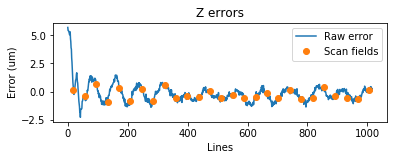

step:crop1
step:clean
step:scanPhase
nan
step:crop2


[pySparkUtils] INFO Deleting files from: /Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1BMWR30_151123Run1CleanBinaryPickle
[pySparkUtils] INFO Done deleting files from: /Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1BMWR30_151123Run1CleanBinaryPickle
[pySparkUtils] INFO Saved rdd as pickle to: /Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1BMWR30_151123Run1CleanBinaryPickle


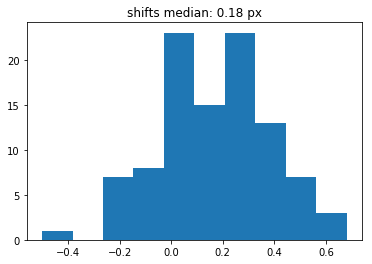

In [5]:
# loads the raw data into data and preformes pre-proceesing on it and returnes it as clean
data, clean, clean_path = loadData(sc, session, cutoff=None, saveBinary=True, binary_path=session.path,
                                   return_clean_path=True,overwrite=True, start=0, stop=4, timepoints=100)

In [6]:
data # raw data

Images
mode: spark
dtype: int16
shape: (873, 36, 72, 30)

In [7]:
clean # after pre-proccesing

Images
mode: spark
dtype: int16
shape: (873, 36, 68, 27)

In [8]:
clean_path # binary of the clean data

'/Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1BMWR30_151123Run1CleanBinaryPickle'

In [9]:
regDict = initRegDict(session=session, data=clean) # set defaults for registration

prep.Registration @ 2019-06-19 19:28:37,086 - [INFO] Registration::initRegDict: Folder: /Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1intermediates/ exists, files will be overwritten


 ## look at the data to select a crop for getting a global signal

In [10]:
mean = clean.mean().toarray()
print(mean.shape)
browse_data3D(mean) 

(36, 68, 27)


interactive(children=(IntSlider(value=13, description='index1', max=26), Output()), _dom_classes=('widget-inte…

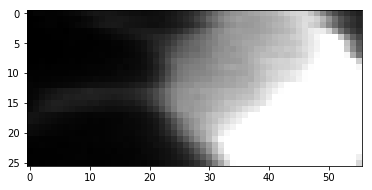

In [11]:
cellCrop = getCrop(mean, index=[14], yStart=6, yStop=32, xStart=8, xStop=64, excludeIndex=False)

In [12]:
getGlobalSignal(sc=sc, regDict=regDict, cropDict=cellCrop, minDFF=0.5)

## get an inital target

prep.Registration @ 2019-06-19 19:30:16,485 - [INFO] Registration::getInitClustersSVD: SVD:: 00:42
prep.Registration @ 2019-06-19 19:30:16,764 - [INFO] Registration::getInitClustersSVD: Cluster:: 00:42
prep.Registration @ 2019-06-19 19:30:16,818 - [INFO] Registration::runInitTarget: Creating a TForm with xStart: 2, and xStop 70


/Users/moharb/anaconda3/envs/spine3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



prep.Embedding @ 2019-06-19 19:33:32,494 - [INFO] Embedding::getFieldTFormPar: fieldsTform:: time(s): 195.67499423027039


/Users/moharb/PycharmProjects/SpineImaging/prep/Embedding.py:430: RuntimeWarning:

Mean of empty slice



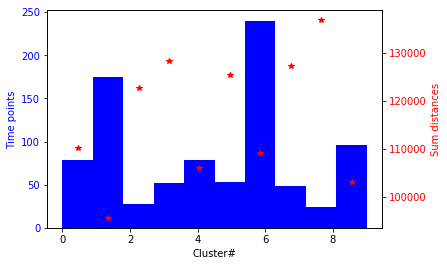

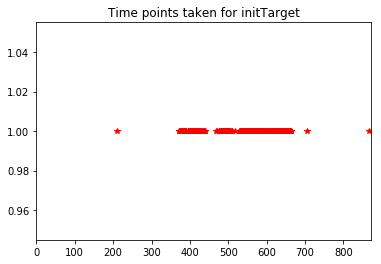

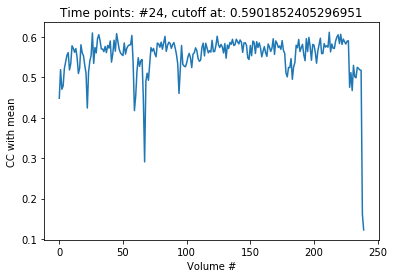

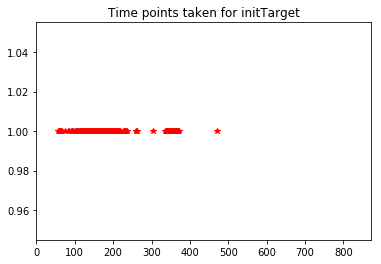

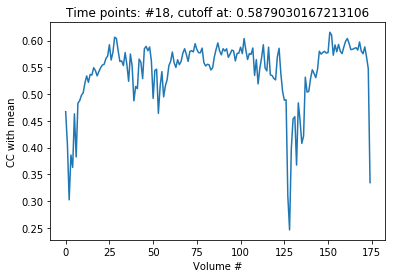

In [13]:
getInitClustersSVD(regDict, initClusterNum=10, initK=15)
TForm1 = runInitTarget(sc, regDict, rankList=(1, 2), session=session)

/Users/moharb/PycharmProjects/SpineImaging/prep/Embedding.py:430: RuntimeWarning:

Mean of empty slice



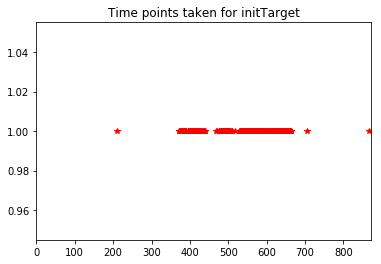

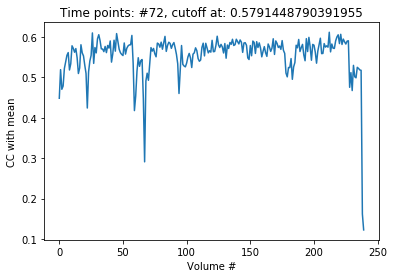

interactive(children=(IntSlider(value=13, description='index1', max=26), Output()), _dom_classes=('widget-inte…

In [14]:
# look at the resutls in the View folder and select rank
getInitTarget(sc=sc, regDict=regDict, rank=1, initCC=70)
regTargetEmbedded = getExampleVol(
    sc, data=regDict['regTarget'], TFormDict=TForm1, project=True)
writeTiff(regDict['fullPath'], regTargetEmbedded, 'regTargetEmbedded')
browse_data3D(regDict['regTarget'].transpose(1, 0, 2))

## get clusters for each plane 

In [15]:
sc = getAllGroupsSVD(sc, session, regDict, full_path=clean_path, change_sc_cluster=False, planeClusterNum=20)

prep.Registration @ 2019-06-19 19:36:19,793 - [INFO] Registration::getAllGroupsSVD: Done: 01:24


In [16]:
session.regDict = regDict
session.save('step1', True)

File '/Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1step1.p' exists
overwrite? (y-Yes, n-No): y
prep.Session @ 2019-06-19 19:37:51,950 - [INFO] Session::save: Session saved to  '/Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1step1.p'


In [17]:
regDict['flyLines']

array([5, 2, 4, 5, 5, 2, 2, 2, 4, 3, 3, 2, 2, 7, 2, 2, 2, 2, 2, 3, 2, 4,
       2, 2, 4, 2, 2])

## get a new target from the registered groups per plane 

In [18]:
getExpandedTarget(sc, regDict=regDict, nIter=2,
                  nanThreshold=2000, cutoffCC=[40, 10])

prep.Registration @ 2019-06-19 19:37:51,965 - [INFO] Registration::getExpandedTarget: Parallelizing allMeanGrpVolPar
prep.Registration @ 2019-06-19 19:42:28,406 - [INFO] Registration::getExpandedTarget: Iteration  1, target shape: (36, 68, 27)


/Users/moharb/PycharmProjects/SpineImaging/prep/Registration.py:558: RuntimeWarning:

Mean of empty slice



prep.Utils @ 2019-06-19 19:42:30,164 - [INFO] Utils::getBestCrop: New nanThreshold: 6000
prep.Registration @ 2019-06-19 19:42:32,441 - [INFO] Registration::getExpandedTarget: expended shape: (39, 74, 27)
prep.Registration @ 2019-06-19 19:42:32,442 - [INFO] Registration::getExpandedTarget: Time:  04:40


In [19]:

cropEmbed(sc, regDict['expandedTarget'], regDict['fullPath'],
          regDict['dims'], TForm1, 'expandedTarget')
browse_data3D(regDict['expandedTarget'].transpose(1, 0, 2))

/Users/moharb/PycharmProjects/SpineImaging/prep/Embedding.py:430: RuntimeWarning:

Mean of empty slice



interactive(children=(IntSlider(value=13, description='index1', max=26), Output()), _dom_classes=('widget-inte…

## align each group to the new group based target (needs real cluster)

In [20]:
runGroupAlignment(sc, regDict, TForm1, percentile=33)

prep.Registration @ 2019-06-19 19:48:15,092 - [INFO] Registration::getXYAlignedGroups: getXYAlignedGroups making allMeanGrpVolAll


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 47 in stage 431.0 failed 1 times, most recent failure: Lost task 47.0 in stage 431.0 (TID 3260, localhost, executor driver): java.lang.OutOfMemoryError: Java heap space

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1651)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1639)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1638)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1638)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1872)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1821)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1810)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2034)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2055)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2074)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:165)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor52.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.lang.OutOfMemoryError: Java heap space


----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 54820)
Traceback (most recent call last):
  File "/Users/moharb/anaconda3/envs/spine3/lib/python3.7/socketserver.py", line 313, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/Users/moharb/anaconda3/envs/spine3/lib/python3.7/socketserver.py", line 344, in process_request
    self.finish_request(request, client_address)
  File "/Users/moharb/anaconda3/envs/spine3/lib/python3.7/socketserver.py", line 357, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/Users/moharb/anaconda3/envs/spine3/lib/python3.7/socketserver.py", line 717, in __init__
    self.handle()
  File "/Users/moharb/Documents/spark/python/pyspark/accumulators.py", line 265, in handle
    poll(accum_updates)
  File "/Users/moharb/Documents/spark/python/pyspark/accumulators.py", line 238, in poll
    if func():
  File "/Users/moharb/Documents/sp

In [14]:
session.regDict = regDict
session.save('step2')

prep.Session @ 2019-06-20 00:53:29,817 - [INFO] Session::save: Session saved to  '/Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1step2p5.p'


INFO:prep.Session:Session saved to  '/Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1step2p5.p'


In [8]:
# look at the results in the View folder and if volume based shifts are better run this:
getXYAlignedGroups(sc, regDict, optimization=False, useVolumeShifts=True)

prep.Registration @ 2019-06-19 19:49:55,764 - [INFO] Registration::getXYAlignedGroups: getXYAlignedGroups making allMeanGrpVolAll


prep.Registration @ 2019-06-19 19:50:22,244 - [INFO] Registration::getXYAlignedGroups: Time:  00:26


## after this registration step regroup the data 

prep.Registration @ 2019-06-20 00:54:35,615 - [INFO] Registration::getFinalGroupsSVD: Pre:  00:03
prep.Registration @ 2019-06-20 00:59:06,093 - [INFO] Registration::getFinalGroupsSVD: SVD:  04:33
prep.Registration @ 2019-06-20 00:59:06,521 - [INFO] Registration::getFinalGroupsSVD: Cluster:  04:33
prep.Registration @ 2019-06-20 00:59:27,658 - [INFO] Registration::getFinalGroupsSVD: Done:  04:55


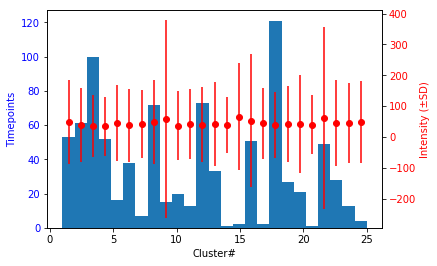

In [9]:
sc = getFinalGroupsSVD(sc, session, regDict, flyLinesFlag=True, finalClusterNum=25)

cropEmbed(sc, regDict['finalGrpImg'], regDict['fullPath'],
          regDict['dims'], TForm1, 'finalGrpImgCluster')

##  get a crop that is informative about the z shifts

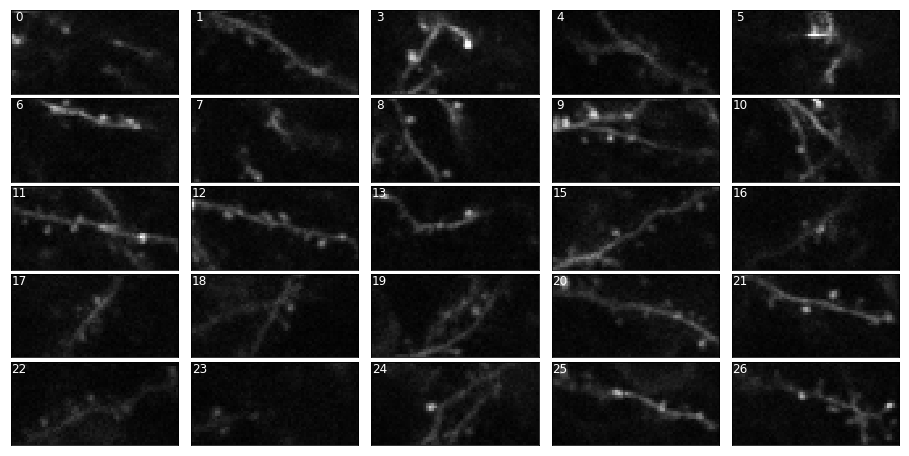

In [11]:
groupCrop = getCrop(regDict['regTarget'], index=[2,14],
                    yStart=2, yStop=34, xStart=3, xStop=67, excludeIndex=True, display=0.7)

In [12]:
estZShiftsGrouping(sc, regDict, nZShifts=3, zFWHM=2.5,
                   crop=groupCrop, nanThreshold=2000)
cropEmbed(sc, regDict['expandedZTargets'], regDict['fullPath'],
          regDict['dims'], TForm1, 'expandedZTargetsCluster')
browse_data4D(regDict['expandedZTargets'], 0, 3)

prep.Registration @ 2019-06-20 01:03:50,114 - [INFO] Registration::estZShiftsGrouping: Original size: (25, 72, 136, 27)
prep.Registration @ 2019-06-20 01:03:50,136 - [INFO] Registration::estZShiftsGrouping: Generating best crop
prep.Utils @ 2019-06-20 01:04:02,378 - [INFO] Utils::getBestCrop: New nanThreshold: 150000
prep.Utils @ 2019-06-20 01:04:12,996 - [INFO] Utils::getBestCrop: New nanThreshold: 450000
prep.Registration @ 2019-06-20 01:05:05,300 - [INFO] Registration::estZShiftsGrouping: group shape after crop: (25, 32, 64, 25), time: 01:15
prep.Registration @ 2019-06-20 01:05:05,449 - [INFO] Registration::estZShiftsGrouping: weightedGroup shape: (25, 72, 136, 27)


/Users/moharb/PycharmProjects/SpineImaging/prep/Registration.py:1242: RuntimeWarning:

Mean of empty slice

/Users/moharb/PycharmProjects/SpineImaging/prep/Registration.py:1246: RuntimeWarning:

Mean of empty slice



prep.Registration @ 2019-06-20 01:05:07,272 - [INFO] Registration::estZShiftsGrouping: origSz: (3, 36, 78, 27)
prep.Registration @ 2019-06-20 01:05:14,687 - [INFO] Registration::estZShiftsGrouping: expSz shape: (36, 78, 81)


/Users/moharb/PycharmProjects/SpineImaging/prep/Embedding.py:430: RuntimeWarning:

Mean of empty slice



NameError: name 'browse_data4D' is not defined

In [13]:
session.regDict = regDict
session.save('step3',False)

prep.Session @ 2019-06-20 01:06:46,914 - [INFO] Session::save: Session saved to  '/Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1step3.p'


## rerun registration time point by time point to each of the new z targets (need a real cluser)

In [21]:
runVolReg(sc, regDict, TForm1, numTimepoints=300, percentile=30)

prep.Registration @ 2019-06-20 01:10:49,354 - [INFO] Registration::WeightedShiftsOptimization: Got data for optimization with 300 time points, 00:01


/Users/moharb/PycharmProjects/SpineImaging/prep/Registration.py:1416: RuntimeWarning:

Mean of empty slice

/Users/moharb/PycharmProjects/SpineImaging/prep/Registration.py:1418: RuntimeWarning:

invalid value encountered in less

/Users/moharb/PycharmProjects/SpineImaging/prep/Registration.py:1422: RuntimeWarning:

Mean of empty slice



prep.Registration @ 2019-06-20 01:10:52,902 - [INFO] Registration::WeightedShiftsOptimization: Volume shifts fano: 20.01, Nans: 10.22, 00:05


/Users/moharb/PycharmProjects/SpineImaging/prep/Registration.py:1423: RuntimeWarning:

Degrees of freedom <= 0 for slice.



Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 1593.0 failed 1 times, most recent failure: Lost task 0.0 in stage 1593.0 (TID 3381, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/moharb/Documents/spark/python/lib/pyspark.zip/pyspark/worker.py", line 253, in main
    process()
  File "/Users/moharb/Documents/spark/python/lib/pyspark.zip/pyspark/worker.py", line 248, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/Users/moharb/Documents/spark/python/pyspark/rdd.py", line 2440, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/Users/moharb/Documents/spark/python/pyspark/rdd.py", line 2440, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/Users/moharb/Documents/spark/python/pyspark/rdd.py", line 2440, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/Users/moharb/Documents/spark/python/pyspark/rdd.py", line 350, in func
    return f(iterator)
  File "/Users/moharb/Documents/spark/python/pyspark/rdd.py", line 1053, in <lambda>
    return self.mapPartitions(lambda i: [sum(1 for _ in i)]).sum()
  File "/Users/moharb/Documents/spark/python/pyspark/rdd.py", line 1053, in <genexpr>
    return self.mapPartitions(lambda i: [sum(1 for _ in i)]).sum()
  File "/Users/moharb/Documents/spark/python/lib/pyspark.zip/pyspark/util.py", line 55, in wrapper
    return f(*args, **kwargs)
  File "/Users/moharb/anaconda3/envs/spine3/lib/python3.7/site-packages/bolt/spark/array.py", line 179, in <lambda>
    rdd = swapped._rdd.map(lambda kv: (kv[0], func(kv)))
  File "/Users/moharb/anaconda3/envs/spine3/lib/python3.7/site-packages/thunder/base.py", line 467, in <lambda>
    expand = lambda x: array(func(x), ndmin=1)
  File "/Users/moharb/PycharmProjects/SpineImaging/prep/Registration.py", line 1587, in getWeightedPlanarDisplacement
    grid0 = (grid0 - np.floor(si[1] / 2) + initShift[1]).flatten()
IndexError: index 1 is out of bounds for axis 0 with size 1

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:330)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:470)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:453)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:284)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$12.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$12.apply(RDD.scala:945)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2074)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2074)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1651)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1639)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1638)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1638)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1872)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1821)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1810)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2034)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2055)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2074)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:165)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor65.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/moharb/Documents/spark/python/lib/pyspark.zip/pyspark/worker.py", line 253, in main
    process()
  File "/Users/moharb/Documents/spark/python/lib/pyspark.zip/pyspark/worker.py", line 248, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/Users/moharb/Documents/spark/python/pyspark/rdd.py", line 2440, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/Users/moharb/Documents/spark/python/pyspark/rdd.py", line 2440, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/Users/moharb/Documents/spark/python/pyspark/rdd.py", line 2440, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/Users/moharb/Documents/spark/python/pyspark/rdd.py", line 350, in func
    return f(iterator)
  File "/Users/moharb/Documents/spark/python/pyspark/rdd.py", line 1053, in <lambda>
    return self.mapPartitions(lambda i: [sum(1 for _ in i)]).sum()
  File "/Users/moharb/Documents/spark/python/pyspark/rdd.py", line 1053, in <genexpr>
    return self.mapPartitions(lambda i: [sum(1 for _ in i)]).sum()
  File "/Users/moharb/Documents/spark/python/lib/pyspark.zip/pyspark/util.py", line 55, in wrapper
    return f(*args, **kwargs)
  File "/Users/moharb/anaconda3/envs/spine3/lib/python3.7/site-packages/bolt/spark/array.py", line 179, in <lambda>
    rdd = swapped._rdd.map(lambda kv: (kv[0], func(kv)))
  File "/Users/moharb/anaconda3/envs/spine3/lib/python3.7/site-packages/thunder/base.py", line 467, in <lambda>
    expand = lambda x: array(func(x), ndmin=1)
  File "/Users/moharb/PycharmProjects/SpineImaging/prep/Registration.py", line 1587, in getWeightedPlanarDisplacement
    grid0 = (grid0 - np.floor(si[1] / 2) + initShift[1]).flatten()
IndexError: index 1 is out of bounds for axis 0 with size 1

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:330)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:470)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:453)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:284)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$12.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$12.apply(RDD.scala:945)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2074)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2074)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [5]:
# look at the resutls in the View folder and apply the best shifts
regData = applyShifts(sc=sc, regDict=regDict, shifts=regDict['shiftsGroupsTime'])
regDict['regData'] = regData
regDict['regData'].cache()
regDict['regData'].count()
getAlignedGroups(regDict)

NameError: name 'regDict' is not defined

## reestimate z shifts after the time point by tim point registration step 

prep.Registration @ 2019-06-20 01:12:29,895 - [INFO] Registration::estZShifts: group shape:(24, 32, 64, 25)


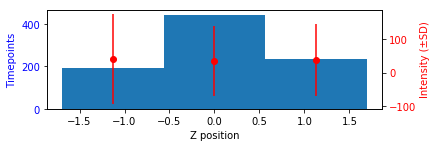

prep.Registration @ 2019-06-20 01:12:30,973 - [INFO] Registration::estZShifts: Z positions: [-1.69163682  0.          1.69163682]


/Users/moharb/PycharmProjects/SpineImaging/prep/Embedding.py:430: RuntimeWarning:

Mean of empty slice



interactive(children=(IntSlider(value=1, description='index1', max=2), IntSlider(value=13, description='index2…

In [24]:
estZShifts(regDict, nZShifts=3, zFWHM=2.5, crop=groupCrop, noAP=True, shifts='shiftsGroupsTime')
groupsZEmbedded = getExampleVol(sc, regDict['groupZ'], TForm1, project=True)
writeTiff(regDict['fullPath'], groupsZEmbedded.transpose(1, 2, 0), 'groupZ')
browse_data4D(regDict['groupZ'], 0, 3)

## create a volume to trace that takes into account the z positions of the averaged data

In [27]:
embedDict = session.embedDict
prepareCoordinatesZExp(embedDict, regDict['grpZPos'], True)
TFormExp = getFieldTFormPar(sc, embedDict, zExpand=True, xDim=(2, 70))
embedDict['TFormExp'] = TFormExp
expended = getExtendedVol(sc, regDict['groupZ'], embedDict, TFormExp)
writeTiff(regDict['fullPath'], expended, 'expended_new')

/Users/moharb/anaconda3/envs/spine3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



prep.Embedding @ 2019-06-20 01:17:18,470 - [INFO] Embedding::getFieldTFormPar: fieldsTform:: time(s): 220.4056031703949


## save the registered data as a binary 

In [31]:

regData = regDict['regData']
save_rdd_as_pickle(regData, session.path+'RegBinaryPickle', overwrite=True)

[pySparkUtils] INFO Saved rdd as pickle to: /Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1RegBinaryPickle


In [28]:
session.path+'RegBinaryPickle'

'/Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1RegBinaryPickle'

## load and aligen the behavioral data 

prep.Behavior @ 2019-06-20 09:27:11,159 - [INFO] Behavior::loadBehavior: loadBehavior:: no missing frames
prep.Behavior @ 2019-06-20 09:27:12,171 - [INFO] Behavior::aggregateByType: aggregateByType:: 27 planes: 
prep.Behavior @ 2019-06-20 09:27:15,121 - [INFO] Behavior::aggregateByType: 0


/Users/moharb/PycharmProjects/SpineImaging/prep/Behavior.py:214: RuntimeWarning:

Mean of empty slice



prep.Behavior @ 2019-06-20 09:27:17,290 - [INFO] Behavior::aggregateByType: 1
prep.Behavior @ 2019-06-20 09:27:19,396 - [INFO] Behavior::aggregateByType: 2
prep.Behavior @ 2019-06-20 09:27:20,943 - [INFO] Behavior::aggregateByType: 3
prep.Behavior @ 2019-06-20 09:27:23,171 - [INFO] Behavior::aggregateByType: 4
prep.Behavior @ 2019-06-20 09:27:25,403 - [INFO] Behavior::aggregateByType: 5
prep.Behavior @ 2019-06-20 09:27:27,710 - [INFO] Behavior::aggregateByType: 6
prep.Behavior @ 2019-06-20 09:27:29,364 - [INFO] Behavior::aggregateByType: 7
prep.Behavior @ 2019-06-20 09:27:31,140 - [INFO] Behavior::aggregateByType: 8
prep.Behavior @ 2019-06-20 09:27:32,972 - [INFO] Behavior::aggregateByType: 9
prep.Behavior @ 2019-06-20 09:27:34,936 - [INFO] Behavior::aggregateByType: 10
prep.Behavior @ 2019-06-20 09:27:36,419 - [INFO] Behavior::aggregateByType: 11
prep.Behavior @ 2019-06-20 09:27:38,622 - [INFO] Behavior::aggregateByType: 12
prep.Behavior @ 2019-06-20 09:27:40,164 - [INFO] Behavior::ag

/Users/moharb/PycharmProjects/SpineImaging/prep/Embedding.py:430: RuntimeWarning:

Mean of empty slice

/Users/moharb/PycharmProjects/SpineImaging/prep/Behavior.py:283: RuntimeWarning:

invalid value encountered in less



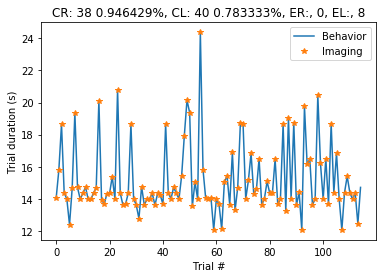

In [32]:
behavDict = runBehavior(sc, session, regData, TForm1)

In [33]:
session.behavDict = behavDict
session.embedDict = embedDict
session.regDict = regDict
session.save('step5', False)

prep.Session @ 2019-06-20 09:32:56,203 - [INFO] Session::save: Session saved to  '/Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1step5.p'


# Time course extraction 

## imports  

In [6]:
from prep.Timecourses import *

In [7]:
# after tracing the session, a few files are generates:
# 1.mask file 

In [8]:
TFormExp = session.embedDict['TFormExp']
regDict = session.regDict
timeDict = initTimeDict(session, maskName='mask')

prep.Timecourses @ 2019-06-26 10:16:32,856 - [INFO] Timecourses::initTimeDict: timeDict initialized with full path:/Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1mask.mat


In [9]:
timeDict['databasePath']

'/Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/Database/BMWR30/FOV2/151123Run1'

## load mask information and devide dendrite into small / large chunks


In [56]:
session.Sp['OptionsStruct']['filename']

'Z:\\Analysis_share\\segmentation sample\\BMWR30\\FOV2\\Cell4_FOV2_CD1_v2_zSpline.swc'

In [10]:
loadMask(timeDict)
binDendrite(sc,timeDict)
getMasks(timeDict)
session.writeTiff(timeDict['labelimgAll'],'labelimgAll')


prep.Timecourses @ 2019-06-26 10:16:32,867 - [INFO] Timecourses::loadMask: Trying to load: /Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1mask
prep.Timecourses @ 2019-06-26 10:16:33,040 - [INFO] Timecourses::loadMask: imported mask with dims: (420, 389, 57) ,branches: 17, spine masks:119


TypeError: getMasksDF() got an unexpected keyword argument 'fix'

<Figure size 936x936 with 0 Axes>

/Users/moharb/PycharmProjects/SpineImaging/prep/Timecourses.py:495: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



<Figure size 936x936 with 0 Axes>

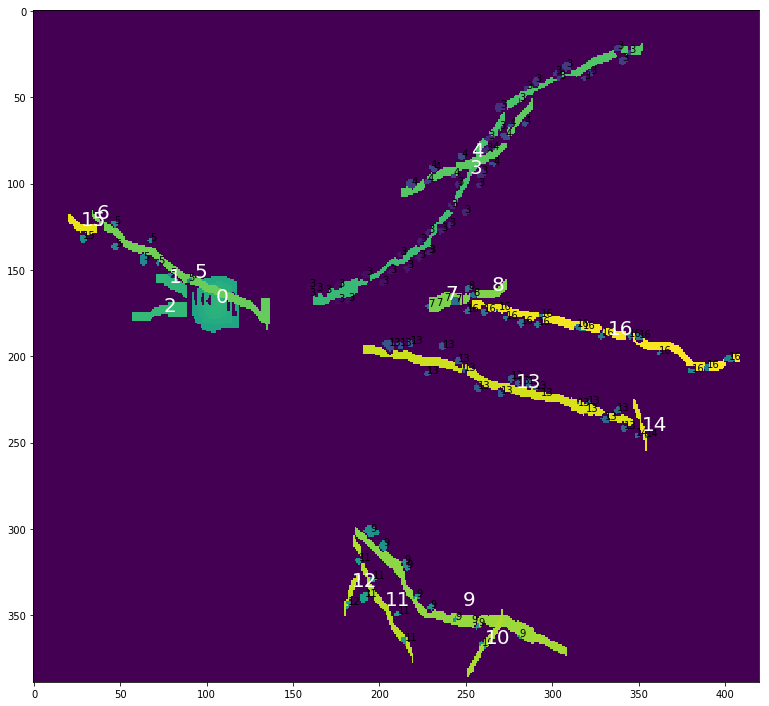

In [11]:
plt.figure(figsize=(13,13))
getMasksDF(timeDict)

## set soma and exclude indexs 

In [16]:
Masks = timeDict['Masks']
timeDict['cellIndex'] =  Masks[(Masks.DendNum ==0) & (Masks.MaskType == 'Dendrite')].index.values
timeDict['excludeIndex'] = Masks[(Masks.DendNum ==10) |(Masks.DendNum ==11)|(Masks.DendNum ==12)
                                |(Masks.DendNum ==14)].index.values

## Register volume to refernace stack

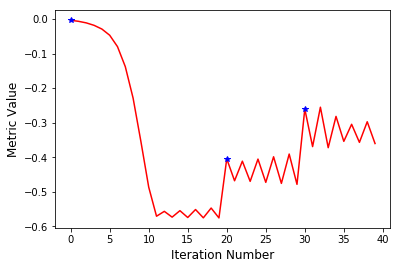

prep.Timecourses @ 2019-06-26 11:13:47,563 - [INFO] Timecourses::getTransform: Final metric value: -0.29392439876136445
prep.Timecourses @ 2019-06-26 11:13:47,564 - [INFO] Timecourses::getTransform: Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
prep.Utils @ 2019-06-26 11:13:53,979 - [INFO] Utils::convert_8bit: Saturation set at 99.0000 percent


/Users/moharb/PycharmProjects/SpineImaging/prep/Utils.py:203: RuntimeWarning:

invalid value encountered in greater



prep.Timecourses @ 2019-06-26 11:14:01,288 - [INFO] Timecourses::getTransform: Saved inverse transform to /Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1InvTransform.h5


Centers  MaskType  DendNum  \
119   (35.236421845574384, 65.41231638418078, 33.0)  Dendrite        0   
120    (38.06228034875922, 68.38356807511735, 33.0)  Dendrite        0   
121    (42.21237095363079, 68.26564304461941, 33.0)  Dendrite        0   
122    (44.31703463203462, 64.94320346320345, 33.0)  Dendrite        0   
123    (42.01996265172735, 59.38566760037347, 33.0)  Dendrite        0   
124    (37.1908111111111, 59.874933333333324, 33.0)  Dendrite        0   
125   (36.393270777479884, 64.80585344057192, 33.0)  Dendrite        0   
126    (40.16208333333333, 67.15721014492752, 33.0)  Dendrite        0   
127   (42.93999999999999, 63.844999999999985, 33.0)  Dendrite        0   
128    (40.77204715969989, 60.30057877813503, 33.0)  Dendrite        0   
129  (37.594850843060954, 62.860830090791175, 33.0)  Dendrite        0   
130    (39.70066666666666, 65.92152688172041, 33.0)  Dendrite        0   
131  (40.729643053267424, 62.109665019220195, 33.0)  Dendrite        0   
132   (39.489859943977585, 63.77589169000932, 33.0)  Dendrite        0   
133     (40.3313829787234, 62.97546099290779, 33.0)  Dendrite        0   

     DendSegment                                     AnatomyCenters  Segment  \
119          0.0  (215.29938003119958, 94.81137946170966, 216.13...        8   
120          1.0  (218.1407833893565, 97.79653266927718, 216.137...       25   
121          2.0  (222.31143511638135, 97.68946491582628, 216.14...       29   
122          3.0  (224.4248747784413, 94.36557259793045, 216.155...       29   
123          4.0  (222.11357636059068, 88.7900343789069, 216.159...       22   
124          5.0  (217.26067755316984, 89.26741718228993, 216.14...       22   
125          6.0  (216.46167011957945, 94.20671960346903, 216.13...       16   
126          7.0  (220.250399096024, 96.57317971530051, 216.1435...       17   
127          8.0  (223.04044215683734, 93.26134078925877, 216.15...       17   
128          9.0  (220.85992333907606, 89.70355659584595, 216.15...       22   
129         10.0  (217.66823611419704, 92.26076406381432, 216.14...       17   
130         11.0  (219.78606434378503, 95.33362576660207, 216.14...       17   
131         12.0  (220.81822416982158, 91.51638792361288, 216.15...       22   
132         13.0  (219.57312420231156, 93.18284987962886, 216.14...       17   
133         14.0  (220.4184234416482, 92.38296450297784, 216.150...       17   

                            ConnectingPoint  ConnectingDist  ParentId  
119    (215.25390625, 92.4755859375, 212.8)        4.073221     253.0  
120     (218.388671875, 98.22265625, 214.4)        1.806100     359.0  
121  (224.1357421875, 96.6552734375, 214.4)        2.728654     853.0  
122     (224.1357421875, 96.1328125, 214.4)        2.507441     853.0  
123   (222.0458984375, 88.818359375, 216.0)        0.175419     359.0  
124       (221.5234375, 89.86328125, 216.0)        4.306787     253.0  
125   (216.8212890625, 92.998046875, 212.8)        3.569985     253.0  
126   (220.478515625, 94.5654296875, 216.0)        2.025760     360.0  
127     (220.478515625, 94.04296875, 216.0)        2.682942     853.0  
128       (221.5234375, 89.86328125, 216.0)        0.699952     359.0  
129     (220.478515625, 94.04296875, 216.0)        3.330919     359.0  
130   (220.478515625, 94.5654296875, 216.0)        1.044278     360.0  
131     (221.5234375, 90.3857421875, 216.0)        1.341252     359.0  
132     (220.478515625, 94.04296875, 216.0)        1.257498     359.0  
133     (220.478515625, 94.04296875, 216.0)        1.667888     359.0

In [12]:
loadInfo(timeDict, )
transformInv = getTransform(timeDict)
session.writeTiff(timeDict['aligned'],'aligned')
transformPoints(timeDict, transformInv, useSWC=True)
timeDict['Masks'][timeDict['Masks'].DendNum==0]

prep.Timecourses @ 2019-06-26 13:08:35,396 - [INFO] Timecourses::get_graph_from_swc: loaded SWC from /Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/Database/BMWR30/FOV2/Cell4_FOV2_CD1_v2_zSpline.swc: 
prep.Timecourses @ 2019-06-26 13:08:35,876 - [INFO] Timecourses::get_graph_from_swc: Is tree: True


/Users/moharb/PycharmProjects/SpineImaging/prep/Timecourses.py:1106: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



prep.Timecourses @ 2019-06-26 13:08:44,072 - [INFO] Timecourses::get_soma_dendrites: Using cellIndex
prep.Timecourses @ 2019-06-26 13:08:44,073 - [INFO] Timecourses::get_soma_dendrites: Found [0] as soma dendrite number(s)
prep.Timecourses @ 2019-06-26 13:08:44,228 - [INFO] Timecourses::get_excluded_index: Excluded dend Dist 1 0: [121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138]
prep.Timecourses @ 2019-06-26 13:08:44,423 - [INFO] Timecourses::get_excluded_index: Excluded dend Dist 1 3: [336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 357, 359, 361, 385, 386, 387, 388, 392, 393, 394, 395, 396, 426, 427, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486]
prep.Ti

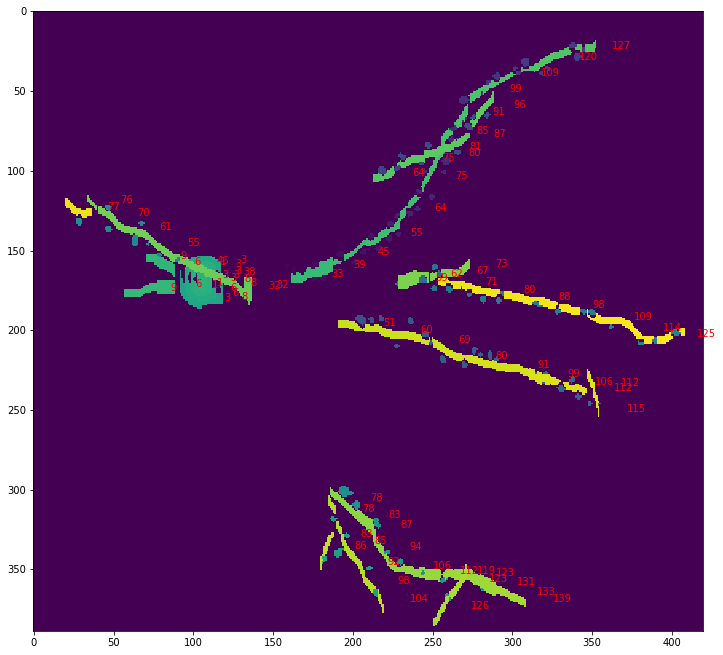

In [17]:
findPathLength(timeDict, session)

In [19]:
regData = load_rdd_from_pickle(sc, '/Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1RegBinaryPickle')

[pySparkUtils] INFO Loaded rdd from: /Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/151123_BMWR30/Run1RegBinaryPickle as type: images


In [20]:
regData

Images
mode: spark
dtype: float32
shape: (873, 36, 68, 27)

In [22]:
timeDict['grpZPos']

array([-1.69163682,  0.        ,  1.69163682])

In [21]:
getFieldMasks(timeDict)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 20.0 failed 1 times, most recent failure: Lost task 0.0 in stage 20.0 (TID 85, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/moharb/Documents/spark/python/lib/pyspark.zip/pyspark/worker.py", line 253, in main
    process()
  File "/Users/moharb/Documents/spark/python/lib/pyspark.zip/pyspark/worker.py", line 248, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/Users/moharb/Documents/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 379, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/Users/moharb/Documents/spark/python/lib/pyspark.zip/pyspark/util.py", line 55, in wrapper
    return f(*args, **kwargs)
  File "/Users/moharb/anaconda3/envs/spine3/lib/python3.7/site-packages/bolt/spark/array.py", line 179, in <lambda>
    rdd = swapped._rdd.map(lambda kv: (kv[0], func(kv)))
  File "/Users/moharb/anaconda3/envs/spine3/lib/python3.7/site-packages/thunder/base.py", line 467, in <lambda>
    expand = lambda x: array(func(x), ndmin=1)
  File "/Users/moharb/PycharmProjects/SpineImaging/prep/Timecourses.py", line 599, in offsetVolPar
    return offsetVol(ary, shiftsBC.value[key, 0, 2], grpZPos).astype('float32')
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:330)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:470)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:453)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:284)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsBytes(MemoryStore.scala:378)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1111)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1085)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:1020)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1085)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:811)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:335)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:286)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1651)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1639)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1638)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1638)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1872)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1821)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1810)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2034)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2055)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2074)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:165)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor66.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/moharb/Documents/spark/python/lib/pyspark.zip/pyspark/worker.py", line 253, in main
    process()
  File "/Users/moharb/Documents/spark/python/lib/pyspark.zip/pyspark/worker.py", line 248, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/Users/moharb/Documents/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 379, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/Users/moharb/Documents/spark/python/lib/pyspark.zip/pyspark/util.py", line 55, in wrapper
    return f(*args, **kwargs)
  File "/Users/moharb/anaconda3/envs/spine3/lib/python3.7/site-packages/bolt/spark/array.py", line 179, in <lambda>
    rdd = swapped._rdd.map(lambda kv: (kv[0], func(kv)))
  File "/Users/moharb/anaconda3/envs/spine3/lib/python3.7/site-packages/thunder/base.py", line 467, in <lambda>
    expand = lambda x: array(func(x), ndmin=1)
  File "/Users/moharb/PycharmProjects/SpineImaging/prep/Timecourses.py", line 599, in offsetVolPar
    return offsetVol(ary, shiftsBC.value[key, 0, 2], grpZPos).astype('float32')
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:330)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:470)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:453)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:284)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsBytes(MemoryStore.scala:378)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1111)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1085)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:1020)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1085)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:811)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:335)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:286)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [24]:

getRegionData(sc, regData, timeDict)

prep.Timecourses @ 2019-06-26 15:30:29,731 - [INFO] Timecourses::getRegionData: Got TC
prep.Timecourses @ 2019-06-26 15:30:35,580 - [INFO] Timecourses::getRegionData: Got TCMotion
prep.Timecourses @ 2019-06-26 15:30:38,486 - [INFO] Timecourses::getRegionData: Got TCPixels


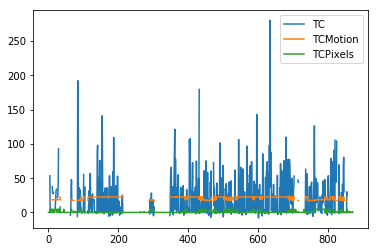

In [27]:
idx=5
plt.plot(timeDict['TC'][idx,:10000])
plt.plot(timeDict['TCMotion'][idx,:10000])
plt.plot(timeDict['TCPixels'][idx,:10000])
plt.legend(['TC','TCMotion','TCPixels'])

In [28]:
getBaseline(sc, timeDict, regWindow=1000, maxZscore=2.)

100%|██████████| 206/206 [02:45<00:00,  1.33it/s]


Need:a
loadData
initRegDict
browse_data3D
getCrop
getGlobalSingal
getExampleVolume
cropEmbed
runBehavior

Text(0,0.5,'df/f')

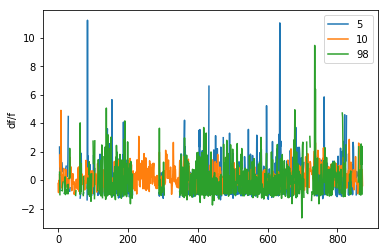

In [32]:
idxs=[5, 10, 98]
plt.plot(timeDict['TCdiv'][idxs[0],:10000])
plt.plot(timeDict['TCdiv'][idxs[1],:10000])
plt.plot(timeDict['TCdiv'][idxs[2],:10000])
plt.legend(idxs)
plt.ylabel('df/f')

In [30]:
getNoise(sc, timeDict)


Text(0,0.5,'Zscore')

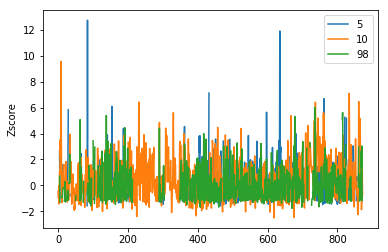

In [33]:
idxs=[5, 10, 98]
plt.plot(timeDict['TCzscore'][idxs[0],:10000])
plt.plot(timeDict['TCzscore'][idxs[1],:10000])
plt.plot(timeDict['TCzscore'][idxs[2],:10000])
plt.legend(idxs)
plt.ylabel('Zscore')

## Bin dendrite at 30um 

prep.Timecourses @ 2019-06-26 15:46:13,787 - [INFO] Timecourses::binDendriteByDistance: Using cellIndex
prep.Timecourses @ 2019-06-26 15:46:13,790 - [INFO] Timecourses::binDendriteByDistance: Found [0] as soma dendrite number(s)


/Users/moharb/PycharmProjects/SpineImaging/prep/Timecourses.py:495: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/Users/moharb/PycharmProjects/SpineImaging/prep/Timecourses.py:500: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



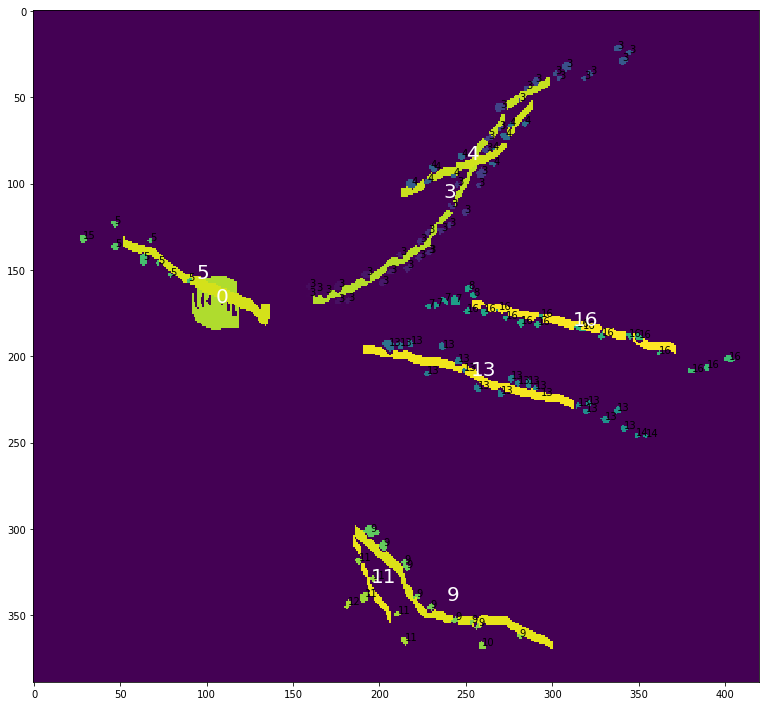

In [35]:
binDendriteByDistance(sc, timeDict, 30, hasSoma=True)
getMasks(timeDict, makeB=True)
getMasksDF(timeDict, makeB=True)
getExcludeIndexB(timeDict)

prep.Timecourses @ 2019-06-26 15:47:29,312 - [INFO] Timecourses::get_graph_from_swc: loaded SWC from /Users/moharb/Dropbox (HHMI)/Projects/ALM_2015_2018/NewRepo/Database/BMWR30/FOV2/Cell4_FOV2_CD1_v2_zSpline.swc: 
prep.Timecourses @ 2019-06-26 15:47:29,816 - [INFO] Timecourses::get_graph_from_swc: Is tree: True


/Users/moharb/PycharmProjects/SpineImaging/prep/Timecourses.py:1106: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



prep.Timecourses @ 2019-06-26 15:47:37,868 - [INFO] Timecourses::get_soma_dendrites: Using cellIndex
prep.Timecourses @ 2019-06-26 15:47:37,870 - [INFO] Timecourses::get_soma_dendrites: Found [0] as soma dendrite number(s)
prep.Timecourses @ 2019-06-26 15:47:38,028 - [INFO] Timecourses::get_excluded_index: Excluded dend Dist 1 0: [121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138]
prep.Timecourses @ 2019-06-26 15:47:38,236 - [INFO] Timecourses::get_excluded_index: Excluded dend Dist 1 3: [336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 357, 359, 361, 385, 386, 387, 388, 392, 393, 394, 395, 396, 426, 427, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486]
prep.Ti

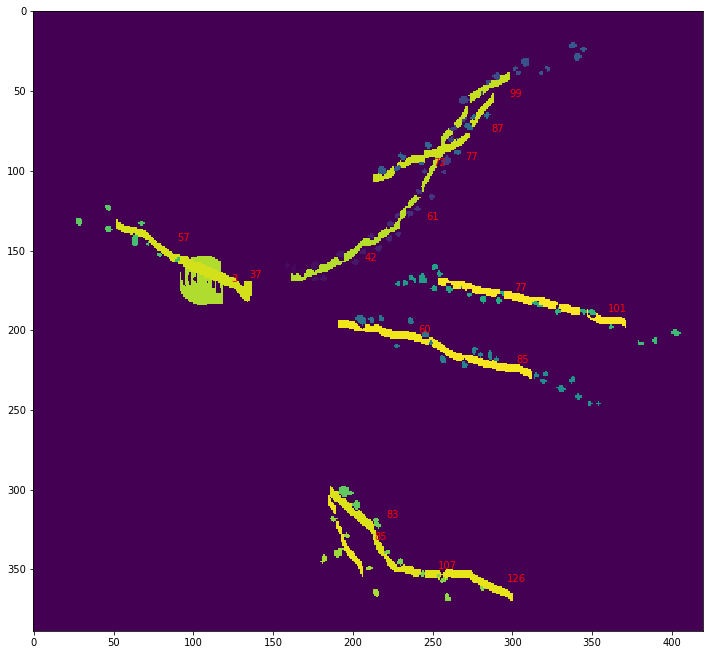

In [36]:
transformPoints(timeDict, transformInv, useSWC=True , makeB=True)
findPathLength(timeDict, session, makeB=True)
getFieldMasks(timeDict, makeB=True)

In [37]:
getRegionData(sc, regData, timeDict, makeB=True)
getBaseline(sc, timeDict, makeB=True)
getNoise(sc, timeDict, makeB=True)

prep.Timecourses @ 2019-06-26 15:48:05,083 - [INFO] Timecourses::getRegionData: Got TCB
prep.Timecourses @ 2019-06-26 15:48:09,606 - [INFO] Timecourses::getRegionData: Got TCMotionB
prep.Timecourses @ 2019-06-26 15:48:12,478 - [INFO] Timecourses::getRegionData: Got TCPixelsB


100%|██████████| 136/136 [01:51<00:00,  1.28it/s]


Text(0.5,0,'time points')

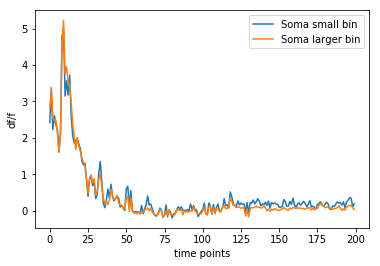

In [55]:
soma_dend = timeDict['soma_dends'][0]
MasksB = timeDict['MasksB']
MasksB[MasksB.DendNum == soma_dend].index.values
soma_1 = timeDict['cellIndex'][0]
soma_b = MasksB[MasksB.DendNum == soma_dend].index.values[0]
plt.plot(timeDict['TCdiv'][soma_1, :200])
plt.plot(timeDict['TCdivB'][soma_b, :200])
plt.legend(['Soma small bin', 'Soma larger bin'])
plt.ylabel('df/f')
plt.xlabel('time points')